In [1]:
#===============================================================================
#
# SCRIPT :  calculate_water_masses.py
#
# PURPOSE : Ingest output from US East water age model and plot the water masses
#           from different shelf domain regions (GOM,SAB,MAB,GOME). The plots
#           will be made as T-S diagrams. Eventual plan is to add the Levitus
#           climatology T-S if I can download it.
#
# METHOD :
#
# HISTORY : Created by Austin Todd on 6 July 2015 for personal use.
#
#===============================================================================

ATL_file  = '/Volumes/Black_box/Data/USeast/Data/grd/grid_ATLscope.nc'
GOM_file  = '/Volumes/Black_box/Data/USeast/Data/grd/grid_GOMscope.nc'
GOMs_file = '/Volumes/Black_box/Data/USeast/Data/grd/grid_GOM_shelf_scope.nc'
fwd_file  = '/Volumes/Black_box/Data/USeast-age/output/clim/averages/'+\
            'avg_3hrly.nc'
plot_dir  = '/Volumes/Black_box/Data/PLOTS/WaterMass/'

#-------------------------------------------------------------------------------
# Print message to user
#-------------------------------------------------------------------------------
print "----------------------------------------------------------------------"
print " RUNNING: Script calculate_water_masses.py"
print "----------------------------------------------------------------------"
print ""



----------------------------------------------------------------------
 RUNNING: Script calculate_water_masses.py
----------------------------------------------------------------------



In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#-------------------------------------------------------------------------------
# Define all required libraries, routines, and modules
#-------------------------------------------------------------------------------
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import sys
import mpl_toolkits.basemap
import os
import PIL

#-------------------------------------------------------------------------------
# Define all required sub-libraries, sub-routines, and sub-modules
#-------------------------------------------------------------------------------
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from matplotlib import cm


In [4]:
#-------------------------------------------------------------------------------
# Open grid file and read in variables
#-------------------------------------------------------------------------------
print 'Ingesting data from file %s ...' % (ATL_file)
grid_data=Dataset(ATL_file,mode='r')
hmask  = grid_data.variables['mask_rho' ][:,:401-24]
Ascope = grid_data.variables['scope_rho'][:,:401-24]
h      = grid_data.variables['h'        ][:,:401-24]
lon    = grid_data.variables['lon_rho'  ][:,:401-24]
lat    = grid_data.variables['lat_rho'  ][:,:401-24]
grid_data.close()

print 'Ingesting data from file %s ...' % (GOM_file)
grid_data=Dataset(GOMs_file,mode='r')
GOMscope = grid_data.variables['scope_rho'][:,:401-24]
grid_data.close()

print 'Ingesting data from file %s ...' % (GOMs_file)
grid_data=Dataset(GOMs_file,mode='r')
Gscope = grid_data.variables['scope_rho'][:,:401-24]
grid_data.close()

lon2=lon-0.5*(lon[1,2]-lon[1,1])
lat2=lat-0.5*(lat[2,1]-lat[1,1])


Ingesting data from file /Volumes/Black_box/Data/USeast/Data/grd/grid_ATLscope.nc ...
Ingesting data from file /Volumes/Black_box/Data/USeast/Data/grd/grid_GOMscope.nc ...
Ingesting data from file /Volumes/Black_box/Data/USeast/Data/grd/grid_GOM_shelf_scope.nc ...


In [5]:
#-------------------------------------------------------------------------------
# Create SAB, MAB, and GME masks
#-------------------------------------------------------------------------------
SABmask=np.array(Ascope)
MABmask=np.array(Ascope)
GMEmask=np.array(Ascope)

#-------------------------------------------------------------------------------
# Define diagonal line at Hatteras 
# Cutoff for MAB/Gulf of Maine will simply be if it is lat < 41.7 & lon > 70.5
#-------------------------------------------------------------------------------
mHat=(35.2-35.3)/(-75+75.5)
bHat=(mHat*75)+35.2

#-------------------------------------------------------------------------------
# First set certain areas of the mask=0 where we know the lines won't cross
# (this will save some time looping through the parts of the grid)
#-------------------------------------------------------------------------------
SABlnst=np.argmin(abs(lon[0,      :]+81.75))
SABltst=np.argmin(abs(lat[:,SABlnst]-26.5))
SABlnen=np.argmin(abs(lon[0,      :]+74.5))
SABlten=np.argmin(abs(lat[:,SABlnen]-35.5))
SABmask[SABlten:,SABlnen:]=0

MABlnst=np.argmin(abs(lon[0,      :]+74.5))
MABltst=np.argmin(abs(lat[:,MABlnst]-35.2))
MABlnen=np.argmin(abs(lon[0,      :]+70.4))
MABlten=np.argmin(abs(lat[:,MABlnen]-41.7))
MABmask[0:MABltst,  0:MABlnst]=0
MABmask[ :       ,MABlnen:377]=0
MABmask[MABlten:482,       :]=0

ltst=np.argmin(abs(lat[:,0]-39.5))
GMEmask[0:ltst,:]=0

#-------------------------------------------------------------------------------
# Loop from SABlnst,SABltst to MABlnen,MABlten and assign appropriate values
#-------------------------------------------------------------------------------
for i in range(SABltst,MABlten):
    for j in range(SABlnst,MABlnen):
        
        # First test the Hatteras line (if above, set to MAB otherwise SAB)
        if (lat[i,j]>=(mHat*lon[i,j]+bHat)):
            SABmask[i,j]=0
        else:
            MABmask[i,j]=0
            GMEmask[i,j]=0

        # Now test if the lat < 41.7 and lon > 70.4
        if (lat[i,j]>41.7 and lon[i,j]>70.4):
            SABmask[i,j]=0
            MABmask[i,j]=0
        else:
            GMEmask[i,j]=0


In [7]:
[SABltst,MABlten+1,SABlnst,MABlnen+1]

[206, 404, 177, 294]

In [6]:
#-------------------------------------------------------------------------------
# Read in additional grid variables from forward file
#-------------------------------------------------------------------------------
fwd_data=Dataset(fwd_file,mode='r')
s_r =fwd_data.variables['s_rho'][:]
s_w =fwd_data.variables['s_w'  ][:]
Cs_r=fwd_data.variables['Cs_r' ][:]
Cs_w=fwd_data.variables['Cs_w' ][:]

L=len(fwd_data.dimensions['xi_rho' ])-25
M=len(fwd_data.dimensions['eta_rho'])
N=len(fwd_data.dimensions['s_rho'  ])

hc=200.


In [8]:
#-------------------------------------------------------------------------------
# Open input data file
#-------------------------------------------------------------------------------
input_data=Dataset(fwd_file,mode='r')


In [31]:
np.argmin(abs(lon[0,:]+74.5))

251

In [32]:
np.argmin(abs(lat[:,251]-35.5))

318

Plotting data.


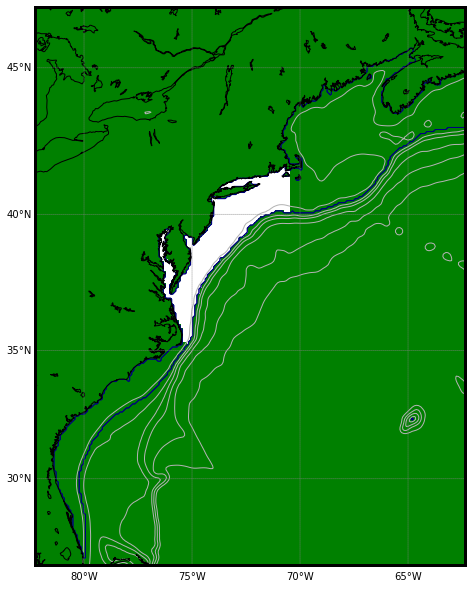

In [9]:
#-----------------------------------------------------------------------------
# Plot Data using Basemap mercator projection
#-----------------------------------------------------------------------------
print 'Plotting data.'
plt.clf()
fig=plt.figure(num=None, figsize=(10, 10), dpi=150, facecolor='w')
m=Basemap(projection='merc',llcrnrlat=26.5,urcrnrlat=lat[481,376],\
          llcrnrlon=-82.25,urcrnrlon=lon[481,376],lat_ts=20,resolution='i')

# Add Grid Lines
m.drawparallels(np.arange(0.,90.,5.), labels=[1,0,0,0],\
                fontsize=10, linewidth=0.75, color='.5')
m.drawmeridians(np.arange(-105.,-35.,5.), labels=[0,0,0,1],\
                fontsize=10, linewidth=0.75, color='.5')

# Draw a thick border around the whole map
m.drawmapboundary(linewidth=3)

# Plot Scope
#Amask=MABmask
#Amask=np.ma.array(Amask,mask=Amask)
xi, yi = m(lon,lat)
cs = m.pcolormesh(xi,yi,MABmask,cmap=cm.ocean,vmin=0, vmax=1)

# Contour depths (but first mask Pacific)
xi, yi = m(lon,lat)
cn  = m.contour(xi,yi,h,[100,500,1000,2000,3000,4000],linewidth=1.5,colors='0.7')
cM1 = m.contour(xi,yi,Ascope,[0.5,0.5],color='k',linewidth=2)

# Contour depths (but first mask Pacific)
#xi, yi = m([-75.5,-75],[35.3,35.2])
#ln=m.plot(xi,yi,'k',linewidth=2)
xi, yi = m([-70.5],[41.7])
ln=m.plot(xi,yi,'k+',linewidth=2)

m.drawcoastlines()

plt.show()

In [88]:
np.min(MABmask)

0.0

In [10]:
MABmask.shape

(482, 377)

In [28]:
a=np.array(np.where(MABmask>0.0))
b=h[min(a[0,:]):max(a[0,:])+1,min(a[1,:]):max(a[0,:])+1]
a=np.array(np.where(b>

In [37]:
temp=input_data.variables['temp'][:,:,min(a[0,:]):max(a[0,:])+1,min(a[1,:]):max(a[0,:])+1]
salt=input_data.variables['salt'][:,:,min(a[0,:]):max(a[0,:])+1,min(a[1,:]):max(a[0,:])+1]


In [52]:
t=input_data.variables['temp'][0,:,min(a[0,:]):max(a[0,:])+1,min(a[1,:]):max(a[0,:])+1]
s=input_data.variables['salt'][0,:,min(a[0,:]):max(a[0,:])+1,min(a[1,:]):max(a[0,:])+1]
b=np.array(np.where(h[min(a[0,:]):max(a[0,:])+1,min(a[1,:]):max(a[0,:])+1]>20))


In [44]:
t.shape

(36, 88, 171)

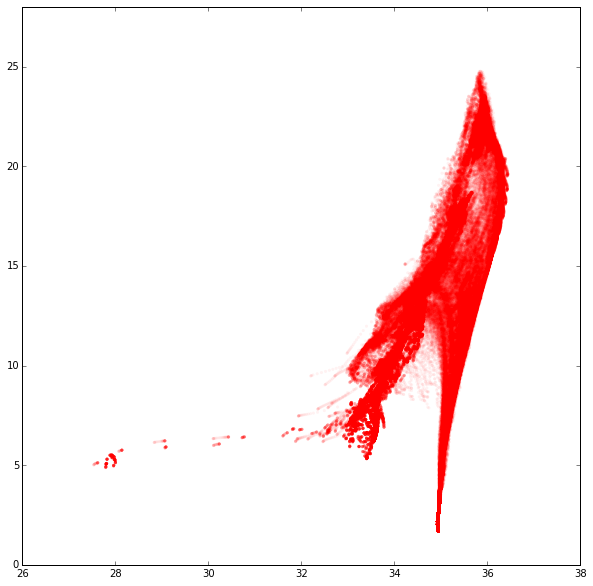

In [56]:
plt.clf()
fig=plt.figure(num=None, figsize=(10, 10), dpi=150, facecolor='w')
plt.scatter(s[:,b[0,:],b[1,:]].ravel(),t[:,b[0,:],b[1,:]].ravel(),s=10,c='r',edgecolor='none',alpha=0.05)
plt.xlim([26,38])
plt.ylim([0,28])
plt.show()

In [ ]:
u=input_data.variables['u'][:,:,280,234]